In [1]:
import cv2
import matplotlib.pyplot as plt
from lib.core import *

In [2]:
cutouter = CutOuter(root='./data/problem', name='example.png')
cutouter.cutout(eps=0)
problem = cv2.cvtColor(cutouter.img, cv2.COLOR_BGR2RGB)

In [3]:
detector = Detector(ckpt='./logs/NumberPlaceDataset/ckpt/last_ckpt.pth')
data = detector.detect(dir='./data/problem/example')

In [4]:
solver = Solver()
result = solver.get_result(data)

In [5]:
img = cutouter.img
height, width = img.shape

for i, col in enumerate(data):
    for j, item in enumerate(col):
        if int(item) == 0:
            cv2.putText(
                img,
                text=str(result[i][j]),
                org=(width // 9 * j + 9, height // 9 * (i + 1) - 9),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0),
                thickness=2,
                lineType=cv2.LINE_4
            )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'answer')

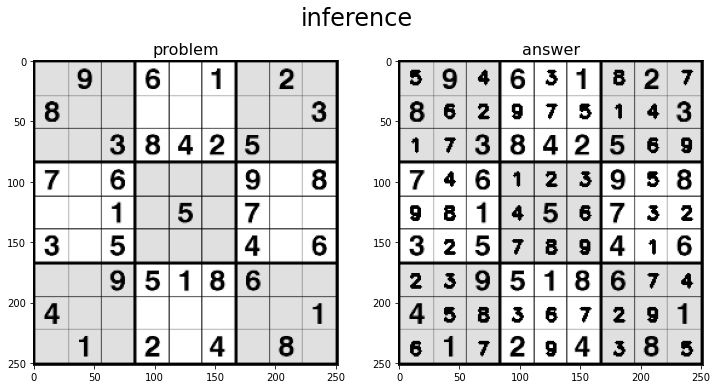

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('inference', fontsize=24, color='black')

ax[0].imshow(problem, cmap='Greys')
ax[0].set_title('problem', fontsize=16, color='black')

ax[1].imshow(img, cmap='Greys')
ax[1].set_title('answer', fontsize=16, color='black')